# Goal: Train LSTM to classify comment (can have several classes)

In [1]:
import pandas as pd # pandas are like excel

In [2]:
train_data = pd.read_csv('/Users/Gabrielle/Kaggle/jigsaw_toxic_comment/train.csv')
test_data = pd.read_csv('/Users/Gabrielle/Kaggle/jigsaw_toxic_comment/test.csv')
train_data[:10] # show the first 10

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,22256635,"Nonsense? kiss off, geek. what I said is true...",1,0,0,0,0,0
1,27450690,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0
2,54037174,"""\n\n """"Points of interest"""" \n\nI removed the...",0,0,0,0,0,0
3,77493077,Asking some his nationality is a Racial offenc...,0,0,0,0,0,0
4,79357270,The reader here is not going by my say so for ...,0,0,0,0,0,0
5,82428052,Fried chickens \n\nIs dat sum fried chickens?,0,0,0,0,0,0
6,87311443,Why can you put English for example on some pl...,0,0,0,0,0,0
7,114749757,Guy Fawkes \n\nim a resident in bridgwater and...,0,0,0,0,0,0
8,138560519,as far as nicknames go this article is embarra...,0,0,0,0,0,0
9,139353149,Woodland Meadows\nGood to hear that you correc...,0,0,0,0,0,0


### 1. Look for examples of each type of comment

In [3]:
train_data[train_data['toxic'] == 1][:10]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,22256635,"Nonsense? kiss off, geek. what I said is true...",1,0,0,0,0,0
20,225701312,Why hasn't Alitalia been removed rom the allia...,1,0,0,0,0,0
26,293668009,"""\nThe Graceful Slick....\nIs non other than a...",1,0,0,0,0,0
30,341549388,"""\n\n Stupid? \n\nAs soon as I saw the phrase ...",1,0,0,0,0,0
32,345843351,"""\nBan one side of an argument by a bullshit n...",1,0,1,0,1,0
39,407636870,Are you gay?? Sound like it,1,0,0,0,0,0
62,659300233,and in the program on last night Crime Museum:...,1,0,0,0,0,0
79,839277218,"""\n\nI didn't call you a """"biased backward yan...",1,0,0,0,0,0
81,867036368,"""\n\nIt was very constructive you are just ver...",1,0,1,0,1,0
86,903134494,"""\n\n You know what? Fuck you! I tried to be c...",1,0,1,0,1,0


### 2. Get the bag of words from the comments (list of all the words from comments)

In [4]:
all_comments_list = list(train_data['comment_text'])
len(all_comments_list)

95851

In [5]:
all_words_list = []
for comment in all_comments_list:
    all_words_list.extend(comment.split(' '))
len(all_words_list)

6517861

### 3. Just for visualisation - Plot frequency count of the words with collections counter (Y-axis: frequency count, X-axis: index of frequency, ie highest frequency first). We see that its a long-tailed distribution

In [6]:
from collections import Counter
occurence_counter = Counter(all_words_list)
word_frequencies = occurence_counter.most_common()
word_frequencies[:10]

[('the', 267335),
 ('to', 173307),
 ('', 135015),
 ('of', 131942),
 ('and', 124039),
 ('a', 121406),
 ('I', 99455),
 ('is', 98841),
 ('you', 94183),
 ('that', 84784)]

Text(0.5,1,'frequency histogram with logarithmic scale')

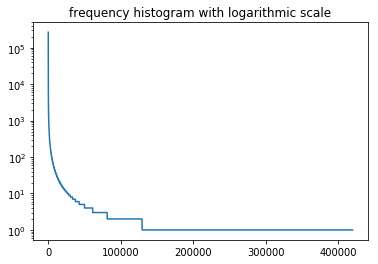

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

freq_vec = [word_freq[1] for word_freq in word_frequencies]
plt.semilogy(freq_vec) # log scale
plt.title('frequency histogram with logarithmic scale')

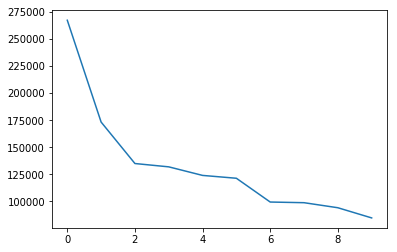

In [8]:
plt.plot(freq_vec[:10])

### 4. Split our train data into X - data (list of comments) and Y - labels matrices (list of list of which class it is)

In [9]:
classes = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
Y = train_data[classes].as_matrix()
# Y = train_data[classes]
# print(Y[:10])
# print(type(train_data))
# Y = Y.as_matrix() # becomes a matrix. Pandas function
print(Y[:10])

X = list(train_data['comment_text'])
print(X[:10])

[[1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
["Nonsense?  kiss off, geek. what I said is true.  I'll have your account terminated.", '"\n\n Please do not vandalize pages, as you did with this edit to W. S. Merwin. If you continue to do so, you will be blocked from editing.    "', '"\n\n ""Points of interest"" \n\nI removed the ""points of interest"" section you added because it seemed kind of spammy. I know you probably didn\'t mean to disobey the rules, but generally, a point of interest tends to be rather touristy, and quite irrelevant to an area culture. That\'s just my opinion, though.\n\nIf you want to reply, just put your reply here and add {{talkback|Jamiegraham08}} on my talkpage.   "', "Asking some his nationality is a Racial offence. Wow wasn't aware of it.  Blocking me has shown your support towards your community. Thanku for that", 'The reader here is not going by my sa

### 5. Split our train data into train, val, test

In [10]:
train_percent = 0.7
val_percent = 0.2
test_percent = 0.1

total_samples = len(Y)

train_index   = int(total_samples * train_percent)
val_index     = int(total_samples * val_percent)
test_index    = int(total_samples * test_percent)

X_train = X[:train_index]
X_val  = X[train_index: train_index + val_index]
X_test  = X[train_index + val_index :]

Y_train = Y[:train_index]
Y_val   = Y[train_index: train_index + val_index]
Y_test  = Y[train_index + val_index :]
# print(len(train_X) + len(val_X) + len(test_X) == len(X))
print(len(X_val), Y_val.shape)

19170 (19170, 6)


### 6a. Tokenizing - build a dictionary of top 10,000 words (specified hyperparameter)

In [11]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

Using TensorFlow backend.
/Users/Gabrielle/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [12]:
token_dict = tokenizer.word_index # index of each word
token_dict

{'the': 1,
 'to': 2,
 'of': 3,
 'and': 4,
 'a': 5,
 'you': 6,
 'i': 7,
 'is': 8,
 'that': 9,
 'in': 10,
 'it': 11,
 'for': 12,
 'this': 13,
 'not': 14,
 'on': 15,
 'be': 16,
 'as': 17,
 'are': 18,
 'have': 19,
 'your': 20,
 'with': 21,
 'if': 22,
 'article': 23,
 'was': 24,
 'or': 25,
 'but': 26,
 'wikipedia': 27,
 'page': 28,
 'my': 29,
 'an': 30,
 'by': 31,
 'from': 32,
 'do': 33,
 'at': 34,
 'me': 35,
 'about': 36,
 'talk': 37,
 'so': 38,
 'can': 39,
 'what': 40,
 'there': 41,
 'all': 42,
 'has': 43,
 'please': 44,
 'will': 45,
 'no': 46,
 'one': 47,
 'like': 48,
 'would': 49,
 'they': 50,
 'just': 51,
 'he': 52,
 'which': 53,
 'been': 54,
 'any': 55,
 'more': 56,
 'should': 57,
 'we': 58,
 "don't": 59,
 'other': 60,
 'some': 61,
 'see': 62,
 'who': 63,
 'here': 64,
 'his': 65,
 'also': 66,
 'think': 67,
 'know': 68,
 'because': 69,
 'how': 70,
 'edit': 71,
 "i'm": 72,
 'why': 73,
 "it's": 74,
 'up': 75,
 'only': 76,
 'people': 77,
 'out': 78,
 'use': 79,
 'articles': 80,
 'am': 81,

### 6b. Tokenizing - Map comments to a list of tokens to represent each word

In [13]:
X_train_tokenized = tokenizer.texts_to_sequences(X_train)
X_val_tokenized = tokenizer.texts_to_sequences(X_val)
X_test_tokenized = tokenizer.texts_to_sequences(X_test)

print(X_train[0], X_train_tokenized[0])
print(token_dict['nonsense'])

Nonsense?  kiss off, geek. what I said is true.  I'll have your account terminated. [799, 4690, 212, 6731, 40, 7, 166, 8, 398, 235, 19, 20, 355]
799


### 7. Define and train keras model

In [14]:
import keras
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

from keras.layers import Dense, Dropout, Activation, Flatten
# from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.recurrent import LSTM, GRU, SimpleRNN
from keras.layers.core import Activation
# from keras.callbacks import EarlyStopping, ModelCheckpoint

In [15]:
input_dim = 10000 # len of dict
output_dim = 128
batch_size=32

In [16]:
# Data Preparation - add padding
max_len = 20
X_train_tokenized_padded = sequence.pad_sequences(X_train_tokenized, maxlen=max_len)
X_val_tokenized_padded = sequence.pad_sequences(X_val_tokenized, maxlen=max_len)
X_test_tokenized_padded = sequence.pad_sequences(X_test_tokenized, maxlen=max_len)

#### LSTM with dropout

In [17]:
print('Build LSTM model...')
model = Sequential()
model.add(Embedding(input_dim=input_dim, output_dim=output_dim))
model.add(LSTM(128))  
model.add(Dropout(0.5))
model.add(Dense(6))
model.add(Activation('sigmoid')) # using sigmoid because each sample can have more than 1 class
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=["accuracy"])

print("Train...")
# model.fit params 
# - if we pass batch_size, tell it how many samples to go through before computing the loss 
# - validation_data
model.fit(X_train_tokenized_padded, Y_train, batch_size=batch_size, epochs=1)
loss, acc = model.evaluate(X_val_tokenized_padded, Y_val, batch_size=batch_size)
print('Val accuracy:', acc)
print('Val loss:', loss)

Build LSTM model...
Train...
Epoch 1/1
19170/19170 [==============================] - 9s 454us/step
Val accuracy: 0.977430010514
Val loss: 0.0663172728127


### Sidetask: Compare predictions and ground truths for obscene comments

In [18]:
import numpy as np

In [21]:
Y_val_pred = model.predict(X_val_tokenized_padded)
print(Y_val_pred[:5]) # rows = comment, column = class score
obscene_pred = Y_val_pred[:, 2] # get obscenity score for all comments
pred_vec = np.where(obscene_pred > 0.5)[0] # get indices

obscene_ground_truth = Y_val[:, 2]
ground_truth_vec = np.where(obscene_ground_truth == 1)[0]
pred_vec = np.where(obscene_pred > 0.5)[0]

correct_predictions = set(pred_vec).intersection(set(ground_truth_vec))

[[  4.26172605e-03   5.19223977e-05   1.56321318e-03   5.57476487e-05
    8.97944032e-04   1.41613753e-04]
 [  3.72838532e-03   5.07356926e-05   1.41569600e-03   5.53624413e-05
    8.31688230e-04   1.33820475e-04]
 [  4.83499989e-02   1.00639137e-03   1.56176183e-02   9.91842709e-04
    1.28254881e-02   2.26126378e-03]
 [  1.07544633e-02   1.82049014e-04   3.78761953e-03   2.12593426e-04
    2.43906467e-03   4.53138637e-04]
 [  8.93074334e-01   6.64384365e-02   6.33811772e-01   1.60780605e-02
    5.58293462e-01   8.21823254e-02]]


In [22]:
no_of_predictions = len(pred_vec)
no_of_ground_truths = len(ground_truth_vec)
no_of_correct_predictions = len(correct_predictions) # intersection set of predictions & groundtruths
no_of_false_alarms = len(pred_vec) - len(correct_predictions) # predictions - correct
print('predictions: {} | ground_truths: {} | correct_predictions: {} | false_alarms: {}'.format(
    no_of_predictions, no_of_ground_truths, no_of_correct_predictions, no_of_false_alarms
))

predictions: 1078 | ground_truths: 1058 | correct_predictions: 786 | false_alarms: 292


In [23]:
recall = 100 * (no_of_correct_predictions / no_of_ground_truths)
precision = 100 * (no_of_correct_predictions / no_of_predictions)
print(recall, precision)

74.29111531190927 72.91280148423006


### 8. Plot precision recall curve - as recall increases, precision decreases. Find optimal threshold

(array([    0,     1,     2, ..., 17337, 17338, 17339]),)

at threshold 0.8760823011398315, we get precision 0.43383742911153117 and recall 0.9310344827586207


Text(0,0.5,'precision')

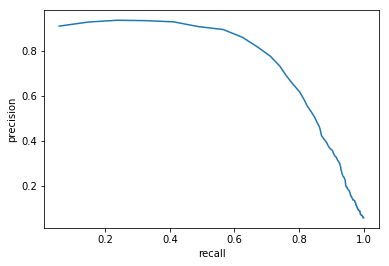

In [24]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(obscene_ground_truth, obscene_pred) # get the optimal threshold
#print(thresholds)
#print(precision, recall)

print(np.where(recall > 0.6)) # say I want a recall of at least 0.6
print() # because recall decreases, the last index is the smaller recall larger than 0.6
print('at threshold {}, we get precision {} and recall {}'.format(thresholds[17575], recall[17575], precision[17575]))

plt.plot(recall[::100], precision[::100])
plt.xlabel('recall')
plt.ylabel('precision')

### 9. Feed my model with new sentences

In [25]:
new_sentences = ['unicorn rainbows', 'fucking unicorn rainbows'] # must be list

In [26]:
# tokenize
new_sentence_tokenized = tokenizer.texts_to_sequences(new_sentences)
# pad
new_sentence_tokenized_padded = sequence.pad_sequences(new_sentence_tokenized, maxlen=max_len)
# model predict
new_sentences_pred = model.predict(new_sentence_tokenized_padded)

In [27]:
classes

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

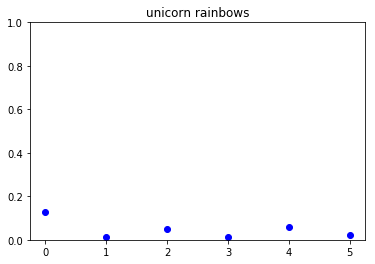

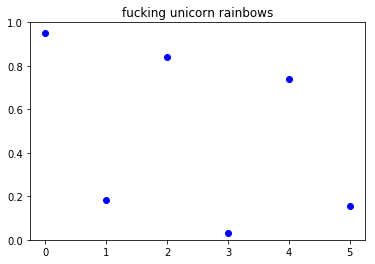

In [28]:
for index, new_sentence_pred in enumerate(new_sentences_pred):
    plt.plot(new_sentence_pred, 'bo')
    plt.ylim((0,1))
    plt.title(new_sentences[index])
    plt.show()